# **Part 1: Data Wrangling**
---------------------------------

### **Task 1: Data Wrangling I**

#### **1. Load Dataset:**

+ ####  **Import Libraries**

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

+ #### **Load the Titanic dataset into a Pandas DataFrame.**

In [176]:
training_data = pd.read_csv('train.csv') # Load the data set into a Datafram 
test_data = pd.read_csv('test.csv')
output_data=pd.read_csv('gender_submission.csv')

In [177]:
training_data.shape  # (rows, columns)

(891, 12)

In [178]:
test_data.shape

(418, 11)

In [179]:
output_data.shape

(418, 2)

+ #### **Display the first 10 rows of the dataset.**

In [180]:
training_data.head(10) 

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [181]:
output_data.head(10)

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0

+ #### **Last 2 rows**

In [182]:
training_data.tail(2)

PassengerId  Survived  Pclass                   Name   Sex   Age  SibSp  \
889          890         1       1  Behr, Mr. Karl Howell  male  26.0      0   
890          891         0       3    Dooley, Mr. Patrick  male  32.0      0   

     Parch  Ticket   Fare Cabin Embarked  
889      0  111369  30.00  C148        C  
890      0  370376   7.75   NaN        Q

In [183]:
output_data.tail(2)

PassengerId  Survived
416         1308         0
417         1309         0

In [184]:
training_data.columns=  training_data.columns.str.strip().str.lower() # convert all columns in lowercase 
test_data.columns=  test_data.columns.str.strip().str.lower()
output_data.columns=  output_data.columns.str.strip().str.lower()

In [185]:
training_data.head(1) 

passengerid  survived  pclass                     name   sex   age  sibsp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   parch     ticket  fare cabin embarked  
0      0  A/5 21171  7.25   NaN        S

#### **2. Handle Missing Values:**

+ #### **Identify columns with missing values**

In [186]:
training_data.isnull() # checking the missing values 

passengerid  survived  pclass   name    sex    age  sibsp  parch  ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      fare  cabin  embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [187]:
training_data.isnull().any()

passengerid    False
survived       False
pclass         False
name           False
sex            False
age             True
sibsp          False
parch          False
ticket         False
fare           False
cabin           True
embarked        True
dtype: bool

In [188]:
training_data.isnull().sum() # checking the missing values per columns

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [189]:
test_data.isnull()

passengerid  pclass   name    sex    age  sibsp  parch  ticket   fare  \
0          False   False  False  False  False  False  False   False  False   
1          False   False  False  False  False  False  False   False  False   
2          False   False  False  False  False  False  False   False  False   
3          False   False  False  False  False  False  False   False  False   
4          False   False  False  False  False  False  False   False  False   
..           ...     ...    ...    ...    ...    ...    ...     ...    ...   
413        False   False  False  False   True  False  False   False  False   
414        False   False  False  False  False  False  False   False  False   
415        False   False  False  False  False  False  False   False  False   
416        False   False  False  False   True  False  False   False  False   
417        False   False  False  False   True  False  False   False  False   

     cabin  embarked  
0     True     False  
1     True     False  
2     True     False  
3     True     False  
4     True     False  
..     ...       ...  
413   True     False  
414  False     False  
415   True     False  
416   True     False  
417   True     False  

[418 rows x 11 columns]

In [190]:
test_data.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [191]:
output_data.isnull()

passengerid  survived
0          False     False
1          False     False
2          False     False
3          False     False
4          False     False
..           ...       ...
413        False     False
414        False     False
415        False     False
416        False     False
417        False     False

[418 rows x 2 columns]

In [192]:
output_data.isnull().sum()

passengerid    0
survived       0
dtype: int64

In [193]:
training_data_d= training_data.duplicated().sum() 
print("Number of duplicate rows in training data: ", training_data_d)

Number of duplicate rows in training data:  0


In [194]:
test_data_d= test_data.duplicated().sum()
print("Number of duplicate rows in test data: ", test_data_d)


Number of duplicate rows in test data:  0


In [195]:
output_data_d= output_data.duplicated().sum()
print("Number of duplicate rows in output data: ", output_data_d)

Number of duplicate rows in output data:  0


+ #### **Use mean imputation for the 'Age' column**

+ Use for numaric features that have missing values 
+ Replace missing values with the mean values of feature
  

In [196]:
training_data['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [197]:
training_data['age'] = training_data['age'].fillna(training_data['age'].mean())
training_data['age'] = training_data['age'].astype(int)
training_data['age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: age, Length: 891, dtype: int32

In [198]:
test_data['age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: age, Length: 418, dtype: float64

In [199]:
test_data['age'] = test_data['age'].fillna(test_data['age'].mean())
test_data['age'] = test_data['age'].astype(int)
test_data['age']

0      34
1      47
2      62
3      27
4      22
       ..
413    30
414    39
415    38
416    30
417    30
Name: age, Length: 418, dtype: int32

+ #### **Use mode imputation for the 'Embarked' column**

+ Use the catagorial feature that have missing values 
+ Replace missing values with the most frequent feature value 

In [200]:
training_data['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [201]:
training_data['embarked'].isnull().sum()

2

In [202]:
training_data['embarked'] = training_data['embarked'].fillna(training_data['embarked'].mode()[0])
training_data['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [203]:
test_data['embarked']

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: embarked, Length: 418, dtype: object

In [204]:
test_data['embarked'].isnull().sum()

0

In [205]:
test_data['embarked'] = test_data['embarked'].fillna(test_data['embarked'].mode()[0])
test_data['embarked']

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: embarked, Length: 418, dtype: object

+ #### **Drop the 'Cabin' column due to a high percentage of missing values**

In [206]:
training_data.shape

(891, 12)

In [207]:
training_data['cabin'].isnull().sum()

687

In [208]:
cabin_missing_percent_training_data = training_data['cabin'].isnull().mean() * 100 # check the percentage of missing values in cabin columns 
print(f'{cabin_missing_percent_training_data:.2f}%')

77.10%


In [209]:
training_data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [210]:
training_data = training_data.drop('cabin', axis=1)
training_data.head(1)

passengerid  survived  pclass                     name   sex  age  sibsp  \
0            1         0       3  Braund, Mr. Owen Harris  male   22      1   

   parch     ticket  fare embarked  
0      0  A/5 21171  7.25        S

In [211]:
test_data.shape

(418, 11)

In [212]:
test_data['cabin'].isnull().sum()

327

In [213]:
cabin_missing_percent_test_data = test_data['cabin'].isnull().mean() * 100
print(f'{cabin_missing_percent_test_data:.2f}%')

78.23%


In [214]:
test_data.columns

Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [215]:
test_data = test_data.drop('cabin', axis=1)
test_data.head(1)

passengerid  pclass              name   sex  age  sibsp  parch  ticket  \
0          892       3  Kelly, Mr. James  male   34      0      0  330911   

     fare embarked  
0  7.8292        Q

In [216]:
training_data.isnull().sum() # again check null values 

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

#### **3. Data Type Conversion:**

+ #### **Convert the 'Pclass' column to a categorical data type**

In [217]:
training_data['pclass'].head(4)

0    3
1    1
2    3
3    1
Name: pclass, dtype: int64

In [218]:
training_data['pclass'].dtype

dtype('int64')

In [219]:
training_data['pclass'] = training_data['pclass'].astype('category')
training_data['pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]

In [220]:
test_data['pclass'].dtype

dtype('int64')

#### **4. Normalization/Scaling:**

+ #### **Normalize the 'Fare' column using Min-Max scaling**

+ ##### It is used to scale and standarize the features of dataset. 
+ ##### Primary goal is to bring all the features to similar scale, typically between 0 and 1. 
+ ##### X'= (X-min)/(max-min)

In [221]:
training_data['fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [222]:
training_data_normalize= (training_data['fare']- training_data['fare'].min())/(training_data['fare'].max()-training_data['fare'].min())
training_data_normalize

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: fare, Length: 891, dtype: float64

In [223]:
test_data['fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: fare, Length: 418, dtype: float64

In [224]:
test_data_normalize= (test_data['fare']- test_data['fare'].min())/(test_data['fare'].max()-test_data['fare'].min())
test_data_normalize

0      0.015282
1      0.013663
2      0.018909
3      0.016908
4      0.023984
         ...   
413    0.015713
414    0.212559
415    0.014151
416    0.015713
417    0.043640
Name: fare, Length: 418, dtype: float64

#### **5. Encoding Categorical Variables:**

+ #### **One-hot encode the 'Sex' and 'Embarked' columns**

In [225]:
training_data.head(2)

passengerid  survived pclass  \
0            1         0      3   
1            2         1      1   

                                                name     sex  age  sibsp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   

   parch     ticket     fare embarked  
0      0  A/5 21171   7.2500        S  
1      0   PC 17599  71.2833        C

In [226]:
training_data['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [227]:
training_data['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

+ ##### **OneHotEncoding use Pandas**

In [228]:
training_data= pd.get_dummies(training_data, columns=['sex', 'embarked'])
training_data

passengerid  survived pclass  \
0              1         0      3   
1              2         1      1   
2              3         1      3   
3              4         1      1   
4              5         0      3   
..           ...       ...    ...   
886          887         0      2   
887          888         1      1   
888          889         0      3   
889          890         1      1   
890          891         0      3   

                                                  name  age  sibsp  parch  \
0                              Braund, Mr. Owen Harris   22      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   38      1      0   
2                               Heikkinen, Miss. Laina   26      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   35      1      0   
4                             Allen, Mr. William Henry   35      0      0   
..                                                 ...  ...    ...    ...   
886                              Montvila, Rev. Juozas   27      0      0   
887                       Graham, Miss. Margaret Edith   19      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"   29      1      2   
889                              Behr, Mr. Karl Howell   26      0      0   
890                                Dooley, Mr. Patrick   32      0      0   

               ticket     fare  sex_female  sex_male  embarked_C  embarked_Q  \
0           A/5 21171   7.2500       False      True       False       False   
1            PC 17599  71.2833        True     False        True       False   
2    STON/O2. 3101282   7.9250        True     False       False       False   
3              113803  53.1000        True     False       False       False   
4              373450   8.0500       False      True       False       False   
..                ...      ...         ...       ...         ...         ...   
886            211536  13.0000       False      True       False       False   
887            112053  30.0000        True     False       False       False   
888        W./C. 6607  23.4500        True     False       False       False   
889            111369  30.0000       False      True        True       False   
890            370376   7.7500       False      True       False        True   

     embarked_S  
0          True  
1         False  
2          True  
3          True  
4          True  
..          ...  
886        True  
887        True  
888        True  
889       False  
890       False  

[891 rows x 14 columns]

In [229]:
test_data= pd.get_dummies(test_data, columns=['sex', 'embarked'])
test_data

passengerid  pclass                                          name  age  \
0            892       3                              Kelly, Mr. James   34   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   47   
2            894       2                     Myles, Mr. Thomas Francis   62   
3            895       3                              Wirz, Mr. Albert   27   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   22   
..           ...     ...                                           ...  ...   
413         1305       3                            Spector, Mr. Woolf   30   
414         1306       1                  Oliva y Ocana, Dona. Fermina   39   
415         1307       3                  Saether, Mr. Simon Sivertsen   38   
416         1308       3                           Ware, Mr. Frederick   30   
417         1309       3                      Peter, Master. Michael J   30   

     sibsp  parch              ticket      fare  sex_female  sex_male  \
0        0      0              330911    7.8292       False      True   
1        1      0              363272    7.0000        True     False   
2        0      0              240276    9.6875       False      True   
3        0      0              315154    8.6625       False      True   
4        1      1             3101298   12.2875        True     False   
..     ...    ...                 ...       ...         ...       ...   
413      0      0           A.5. 3236    8.0500       False      True   
414      0      0            PC 17758  108.9000        True     False   
415      0      0  SOTON/O.Q. 3101262    7.2500       False      True   
416      0      0              359309    8.0500       False      True   
417      1      1                2668   22.3583       False      True   

     embarked_C  embarked_Q  embarked_S  
0         False        True       False  
1         False       False        True  
2         False        True       False  
3         False       False        True  
4         False       False        True  
..          ...         ...         ...  
413       False       False        True  
414        True       False       False  
415       False       False        True  
416       False       False        True  
417        True       False       False  

[418 rows x 13 columns]

### **Task 2: Data Wrangling II**

#### **1. Feature Creation:**

+ #### **Create a new column 'FamilySize' by summing 'SibSp' and 'Parch' plus one**

In [230]:
training_data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [231]:
training_data['familysize']= training_data['sibsp']+ training_data['parch']+1 
training_data['familysize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: familysize, Length: 891, dtype: int64

In [232]:
training_data.head(2)

passengerid  survived pclass  \
0            1         0      3   
1            2         1      1   

                                                name  age  sibsp  parch  \
0                            Braund, Mr. Owen Harris   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   38      1      0   

      ticket     fare  sex_female  sex_male  embarked_C  embarked_Q  \
0  A/5 21171   7.2500       False      True       False       False   
1   PC 17599  71.2833        True     False        True       False   

   embarked_S  familysize  
0        True           2  
1       False           2

In [233]:
test_data.columns

Index(['passengerid', 'pclass', 'name', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [234]:
test_data['familysize']= test_data['sibsp']+ test_data['parch']+1 
test_data['familysize']

0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    1
415    1
416    1
417    3
Name: familysize, Length: 418, dtype: int64

In [235]:
test_data.head(2)

passengerid  pclass                              name  age  sibsp  parch  \
0          892       3                  Kelly, Mr. James   34      0      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)   47      1      0   

   ticket    fare  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  \
0  330911  7.8292       False      True       False        True       False   
1  363272  7.0000        True     False       False       False        True   

   familysize  
0           1  
1           2

+ #### **Create a new binary column 'IsAlone' (1 if FamilySize == 1, else 0)**

In [236]:
training_data['isalone'] = (training_data['familysize']==1).astype(int)
training_data['isalone']


0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: isalone, Length: 891, dtype: int32

In [237]:
training_data.head()

passengerid  survived pclass  \
0            1         0      3   
1            2         1      1   
2            3         1      3   
3            4         1      1   
4            5         0      3   

                                                name  age  sibsp  parch  \
0                            Braund, Mr. Owen Harris   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   38      1      0   
2                             Heikkinen, Miss. Laina   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   35      1      0   
4                           Allen, Mr. William Henry   35      0      0   

             ticket     fare  sex_female  sex_male  embarked_C  embarked_Q  \
0         A/5 21171   7.2500       False      True       False       False   
1          PC 17599  71.2833        True     False        True       False   
2  STON/O2. 3101282   7.9250        True     False       False       False   
3            113803  53.1000        True     False       False       False   
4            373450   8.0500       False      True       False       False   

   embarked_S  familysize  isalone  
0        True           2        0  
1       False           2        0  
2        True           1        1  
3        True           2        0  
4        True           1        1

#### **2. Log Transformation:**

+ #### **Apply a log transformation to the 'Fare' column to handle skewness**

In [238]:
training_data.head(1)

passengerid  survived pclass                     name  age  sibsp  parch  \
0            1         0      3  Braund, Mr. Owen Harris   22      1      0   

      ticket  fare  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  \
0  A/5 21171  7.25       False      True       False       False        True   

   familysize  isalone  
0           2        0

In [239]:
training_data['fare_log']= np.log10(training_data['fare'])
training_data['fare_log']

0      0.860338
1      1.852988
2      0.898999
3      1.725095
4      0.905796
         ...   
886    1.113943
887    1.477121
888    1.370143
889    1.477121
890    0.889302
Name: fare_log, Length: 891, dtype: float64

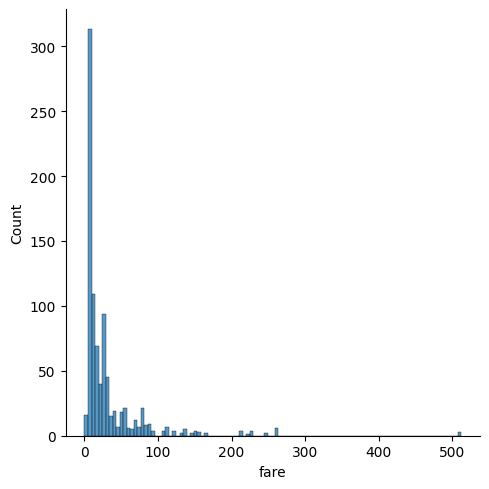

In [240]:
sns.displot(training_data['fare'])
plt.show()

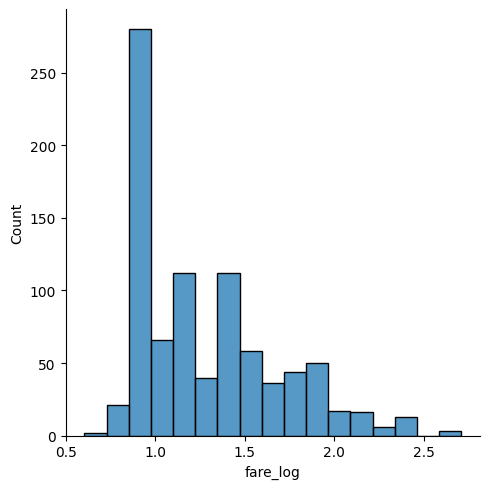

In [241]:
sns.displot(training_data['fare_log'])
plt.show()

#### **3. Regular Expressions:**

+ #### **Extract titles from the 'Name' column and create a new column 'Title'**

In [242]:
training_data.head(5)

passengerid  survived pclass  \
0            1         0      3   
1            2         1      1   
2            3         1      3   
3            4         1      1   
4            5         0      3   

                                                name  age  sibsp  parch  \
0                            Braund, Mr. Owen Harris   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   38      1      0   
2                             Heikkinen, Miss. Laina   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   35      1      0   
4                           Allen, Mr. William Henry   35      0      0   

             ticket     fare  sex_female  sex_male  embarked_C  embarked_Q  \
0         A/5 21171   7.2500       False      True       False       False   
1          PC 17599  71.2833        True     False        True       False   
2  STON/O2. 3101282   7.9250        True     False       False       False   
3            113803  53.1000        True     False       False       False   
4            373450   8.0500       False      True       False       False   

   embarked_S  familysize  isalone  fare_log  
0        True           2        0  0.860338  
1       False           2        0  1.852988  
2        True           1        1  0.898999  
3        True           2        0  1.725095  
4        True           1        1  0.905796

In [243]:
def title(x):
    return x[:x.index(" ")]
training_data["title"]= training_data["name"].apply(title)
training_data.head(3)

passengerid  survived pclass  \
0            1         0      3   
1            2         1      1   
2            3         1      3   

                                                name  age  sibsp  parch  \
0                            Braund, Mr. Owen Harris   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   38      1      0   
2                             Heikkinen, Miss. Laina   26      0      0   

             ticket     fare  sex_female  sex_male  embarked_C  embarked_Q  \
0         A/5 21171   7.2500       False      True       False       False   
1          PC 17599  71.2833        True     False        True       False   
2  STON/O2. 3101282   7.9250        True     False       False       False   

   embarked_S  familysize  isalone  fare_log       title  
0        True           2        0  0.860338     Braund,  
1       False           2        0  1.852988    Cumings,  
2        True           1        1  0.898999  Heikkinen,

In [244]:
def name(x):
    return x[x.index(" ")+1:]
training_data["name"]= training_data["name"].apply(name)
training_data.head(3)

passengerid  survived pclass                                        name  \
0            1         0      3                             Mr. Owen Harris   
1            2         1      1  Mrs. John Bradley (Florence Briggs Thayer)   
2            3         1      3                                 Miss. Laina   

   age  sibsp  parch            ticket     fare  sex_female  sex_male  \
0   22      1      0         A/5 21171   7.2500       False      True   
1   38      1      0          PC 17599  71.2833        True     False   
2   26      0      0  STON/O2. 3101282   7.9250        True     False   

   embarked_C  embarked_Q  embarked_S  familysize  isalone  fare_log  \
0       False       False        True           2        0  0.860338   
1        True       False       False           2        0  1.852988   
2       False       False        True           1        1  0.898999   

        title  
0     Braund,  
1    Cumings,  
2  Heikkinen,

In [245]:
training_data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'familysize', 'isalone', 'fare_log', 'title'],
      dtype='object')

In [246]:
training_data= training_data[['passengerid', 'survived', 'pclass','title','name', 'age', 'sibsp', 'parch','ticket', 'fare', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q','embarked_S', 'familysize', 'isalone', 'fare_log' ]]
training_data.head(2)

passengerid  survived pclass     title  \
0            1         0      3   Braund,   
1            2         1      1  Cumings,   

                                         name  age  sibsp  parch     ticket  \
0                             Mr. Owen Harris   22      1      0  A/5 21171   
1  Mrs. John Bradley (Florence Briggs Thayer)   38      1      0   PC 17599   

      fare  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  \
0   7.2500       False      True       False       False        True   
1  71.2833        True     False        True       False       False   

   familysize  isalone  fare_log  
0           2        0  0.860338  
1           2        0  1.852988

#### **4. Duplicate Handling and Outliers:**

+ #### **Check for and remove duplicate rows**

In [247]:
training_data.duplicated().sum()

0

+ #### **Detect and handle outliers in the 'Fare' and 'Age' columns using the IQR method**

+ #### **For fare column**

In [248]:
q1= np.quantile(training_data['fare'], 0.25)
q3= np.quantile(training_data['fare'], 0.75)

In [249]:
iqr= q3 - q1 
q1, q3, iqr

(7.9104, 31.0, 23.0896)

In [250]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)
min_r, max_r

(-26.724, 65.6344)

In [251]:
training_data[training_data['fare']<= max_r]

passengerid  survived pclass       title  \
0              1         0      3     Braund,   
2              3         1      3  Heikkinen,   
3              4         1      1   Futrelle,   
4              5         0      3      Allen,   
5              6         0      3      Moran,   
..           ...       ...    ...         ...   
886          887         0      2   Montvila,   
887          888         1      1     Graham,   
888          889         0      3   Johnston,   
889          890         1      1       Behr,   
890          891         0      3     Dooley,   

                                   name  age  sibsp  parch            ticket  \
0                       Mr. Owen Harris   22      1      0         A/5 21171   
2                           Miss. Laina   26      0      0  STON/O2. 3101282   
3    Mrs. Jacques Heath (Lily May Peel)   35      1      0            113803   
4                     Mr. William Henry   35      0      0            373450   
5                             Mr. James   29      0      0            330877   
..                                  ...  ...    ...    ...               ...   
886                         Rev. Juozas   27      0      0            211536   
887                Miss. Margaret Edith   19      0      0            112053   
888      Miss. Catherine Helen "Carrie"   29      1      2        W./C. 6607   
889                     Mr. Karl Howell   26      0      0            111369   
890                         Mr. Patrick   32      0      0            370376   

        fare  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  \
0     7.2500       False      True       False       False        True   
2     7.9250        True     False       False       False        True   
3    53.1000        True     False       False       False        True   
4     8.0500       False      True       False       False        True   
5     8.4583       False      True       False        True       False   
..       ...         ...       ...         ...         ...         ...   
886  13.0000       False      True       False       False        True   
887  30.0000        True     False       False       False        True   
888  23.4500        True     False       False       False        True   
889  30.0000       False      True        True       False       False   
890   7.7500       False      True       False        True       False   

     familysize  isalone  fare_log  
0             2        0  0.860338  
2             1        1  0.898999  
3             2        0  1.725095  
4             1        1  0.905796  
5             1        1  0.927283  
..          ...      ...       ...  
886           1        1  1.113943  
887           1        1  1.477121  
888           4        0  1.370143  
889           1        1  1.477121  
890           1        1  0.889302  

[775 rows x 18 columns]

<Axes: ylabel='fare'>

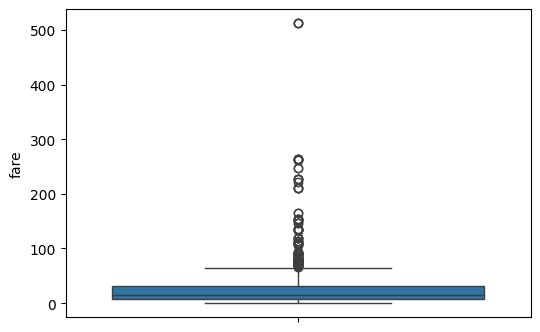

In [252]:
plt.figure(figsize=(6,4))
sns.boxplot(training_data['fare'])

In [253]:
# find the outliers 
training_data.loc[(training_data['fare']> max_r)|(training_data['fare']< min_r) ]

passengerid  survived pclass        title  \
1              2         1      1     Cumings,   
27            28         0      1     Fortune,   
31            32         1      1     Spencer,   
34            35         0      1       Meyer,   
52            53         1      1      Harper,   
..           ...       ...    ...          ...   
846          847         0      3        Sage,   
849          850         1      1  Goldenberg,   
856          857         1      1        Wick,   
863          864         0      3        Sage,   
879          880         1      1      Potter,   

                                           name  age  sibsp  parch    ticket  \
1    Mrs. John Bradley (Florence Briggs Thayer)   38      1      0  PC 17599   
27                        Mr. Charles Alexander   19      3      2     19950   
31        Mrs. William Augustus (Marie Eugenie)   29      1      0  PC 17569   
34                             Mr. Edgar Joseph   28      1      0  PC 17604   
52             Mrs. Henry Sleeper (Myna Haxtun)   49      1      0  PC 17572   
..                                          ...  ...    ...    ...       ...   
846                          Mr. Douglas Bullen   29      8      2  CA. 2343   
849            Mrs. Samuel L (Edwiga Grabowska)   29      1      0     17453   
856        Mrs. George Dennick (Mary Hitchcock)   45      1      1     36928   
863                 Miss. Dorothy Edith "Dolly"   29      8      2  CA. 2343   
879       Mrs. Thomas Jr (Lily Alexenia Wilson)   56      0      1     11767   

         fare  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  \
1     71.2833        True     False        True       False       False   
27   263.0000       False      True       False       False        True   
31   146.5208        True     False        True       False       False   
34    82.1708       False      True        True       False       False   
52    76.7292        True     False        True       False       False   
..        ...         ...       ...         ...         ...         ...   
846   69.5500       False      True       False       False        True   
849   89.1042        True     False        True       False       False   
856  164.8667        True     False       False       False        True   
863   69.5500        True     False       False       False        True   
879   83.1583        True     False        True       False       False   

     familysize  isalone  fare_log  
1             2        0  1.852988  
27            6        0  2.419956  
31            2        0  2.165899  
34            2        0  1.914718  
52            2        0  1.884961  
..          ...      ...       ...  
846          11        0  1.842297  
849           2        0  1.949898  
856           3        0  2.217133  
863          11        0  1.842297  
879           2        0  1.919906  

[116 rows x 18 columns]

In [254]:
# triming and delete the outlires data 
new_dt= training_data.loc[(training_data['fare']< max_r) & (training_data['fare']>  min_r) ]
print("Before removing outliers: ", len(training_data))
print("After removing the outliers: ", len(new_dt))
print("Outliers= ",len(training_data)-len(new_dt) )



Before removing outliers:  891
After removing the outliers:  775
Outliers=  116


In [255]:
# capping: change the outlier values to uper or lower limit value 
new_dt= training_data.copy()
new_dt.loc[(new_dt['fare']>max_r, 'fare')] = max_r
new_dt.loc[(new_dt['fare']<min_r, 'fare')] = min_r

<Axes: ylabel='fare'>

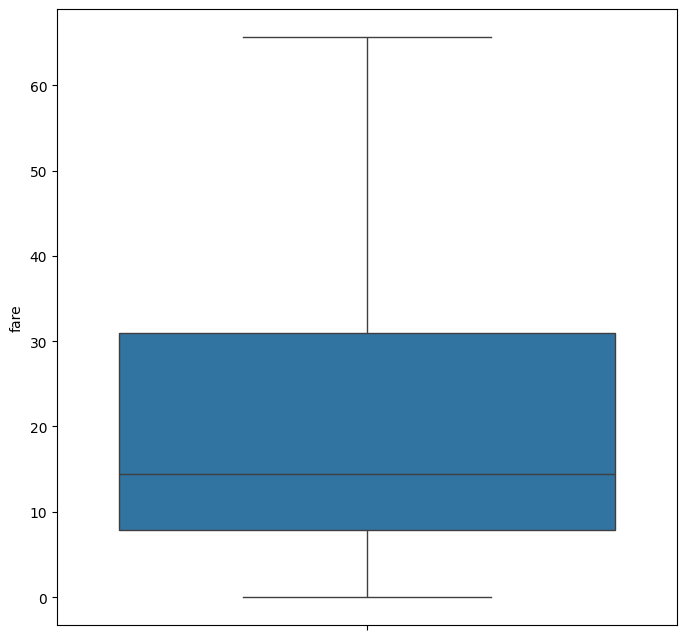

In [256]:
sns.boxplot(new_dt['fare'])

+ #### **For age column**

In [257]:
q1= np.quantile(training_data['age'], 0.25)
q3= np.quantile(training_data['age'], 0.75)
iqr = q3 -q1

In [258]:
min_rr = q1-(1.5*iqr)
max_rr = q3+(1.5*iqr)
min_rr, max_rr

(2.5, 54.5)

In [259]:
training_data[training_data['age']<= max_r]

passengerid  survived pclass       title  \
0              1         0      3     Braund,   
1              2         1      1    Cumings,   
2              3         1      3  Heikkinen,   
3              4         1      1   Futrelle,   
4              5         0      3      Allen,   
..           ...       ...    ...         ...   
886          887         0      2   Montvila,   
887          888         1      1     Graham,   
888          889         0      3   Johnston,   
889          890         1      1       Behr,   
890          891         0      3     Dooley,   

                                           name  age  sibsp  parch  \
0                               Mr. Owen Harris   22      1      0   
1    Mrs. John Bradley (Florence Briggs Thayer)   38      1      0   
2                                   Miss. Laina   26      0      0   
3            Mrs. Jacques Heath (Lily May Peel)   35      1      0   
4                             Mr. William Henry   35      0      0   
..                                          ...  ...    ...    ...   
886                                 Rev. Juozas   27      0      0   
887                        Miss. Margaret Edith   19      0      0   
888              Miss. Catherine Helen "Carrie"   29      1      2   
889                             Mr. Karl Howell   26      0      0   
890                                 Mr. Patrick   32      0      0   

               ticket     fare  sex_female  sex_male  embarked_C  embarked_Q  \
0           A/5 21171   7.2500       False      True       False       False   
1            PC 17599  71.2833        True     False        True       False   
2    STON/O2. 3101282   7.9250        True     False       False       False   
3              113803  53.1000        True     False       False       False   
4              373450   8.0500       False      True       False       False   
..                ...      ...         ...       ...         ...         ...   
886            211536  13.0000       False      True       False       False   
887            112053  30.0000        True     False       False       False   
888        W./C. 6607  23.4500        True     False       False       False   
889            111369  30.0000       False      True        True       False   
890            370376   7.7500       False      True       False        True   

     embarked_S  familysize  isalone  fare_log  
0          True           2        0  0.860338  
1         False           2        0  1.852988  
2          True           1        1  0.898999  
3          True           2        0  1.725095  
4          True           1        1  0.905796  
..          ...         ...      ...       ...  
886        True           1        1  1.113943  
887        True           1        1  1.477121  
888        True           4        0  1.370143  
889       False           1        1  1.477121  
890       False           1        1  0.889302  

[883 rows x 18 columns]

<Axes: ylabel='age'>

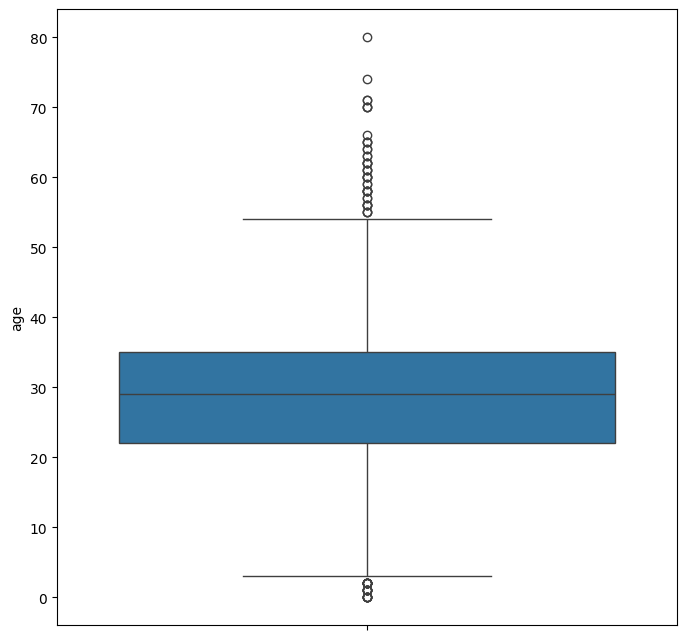

In [260]:
sns.boxplot(training_data['age'])

In [261]:
# find the outliers 
training_data.loc[(training_data['age']> max_rr)|(training_data['age']< min_rr) ]

passengerid  survived pclass      title  \
7              8         0      3   Palsson,   
11            12         1      1   Bonnell,   
15            16         1      2   Hewlett,   
16            17         0      3      Rice,   
33            34         0      2   Wheadon,   
..           ...       ...    ...        ...   
827          828         1      2    Mallet,   
829          830         1      1     Stone,   
831          832         1      2  Richards,   
851          852         0      3  Svensson,   
879          880         1      1    Potter,   

                                      name  age  sibsp  parch  \
7                    Master. Gosta Leonard    2      3      1   
11                         Miss. Elizabeth   58      0      0   
15                 Mrs. (Mary D Kingcome)    55      0      0   
16                          Master. Eugene    2      4      1   
33                            Mr. Edward H   66      0      0   
..                                     ...  ...    ...    ...   
827                          Master. Andre    1      0      2   
829     Mrs. George Nelson (Martha Evelyn)   62      0      0   
831                  Master. George Sibley    0      1      1   
851                              Mr. Johan   74      0      0   
879  Mrs. Thomas Jr (Lily Alexenia Wilson)   56      0      1   

              ticket     fare  sex_female  sex_male  embarked_C  embarked_Q  \
7             349909  21.0750       False      True       False       False   
11            113783  26.5500        True     False       False       False   
15            248706  16.0000        True     False       False       False   
16            382652  29.1250       False      True       False        True   
33        C.A. 24579  10.5000       False      True       False       False   
..               ...      ...         ...       ...         ...         ...   
827  S.C./PARIS 2079  37.0042       False      True        True       False   
829           113572  80.0000        True     False       False       False   
831            29106  18.7500       False      True       False       False   
851           347060   7.7750       False      True       False       False   
879            11767  83.1583        True     False        True       False   

     embarked_S  familysize  isalone  fare_log  
7          True           5        0  1.323768  
11         True           1        1  1.424065  
15         True           1        1  1.204120  
16        False           6        0  1.464266  
33         True           1        1  1.021189  
..          ...         ...      ...       ...  
827       False           3        0  1.568251  
829        True           1        1  1.903090  
831        True           3        0  1.273001  
851        True           1        1  0.890700  
879       False           2        0  1.919906  

[66 rows x 18 columns]

In [262]:
# triming and delete the outlires data 
new_dtt= training_data.loc[(training_data['age']< max_rr) & (training_data['age']>  min_rr) ]
print("Before removing outliers: ", len(training_data))
print("After removing the outliers: ", len(new_dtt))
print("Outliers= ",len(training_data)-len(new_dtt) )

Before removing outliers:  891
After removing the outliers:  825
Outliers=  66


In [263]:
# capping: change the outlier values to uper or lower limit value 
new_dtt= training_data.copy()
new_dtt.loc[(new_dtt['age']>max_rr, 'age')] = max_rr
new_dtt.loc[(new_dtt['age']<min_rr, 'age')] = min_rr

<Axes: ylabel='age'>

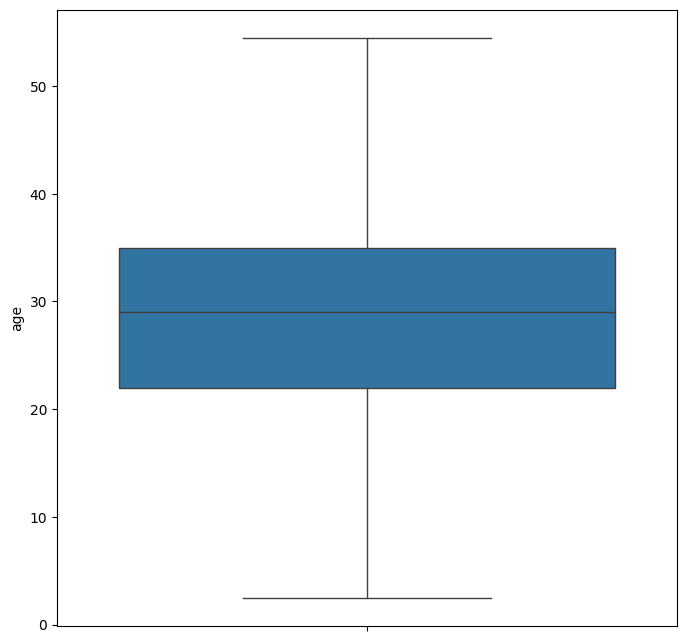

In [264]:
sns.boxplot(new_dtt['age'])

# **Part 2: Exploratory Data Analysis (EDA)**
---------------------------------------

### **Task 1: Exploratory Data Analysis I**

#### **1. Summary Statistics:**

+ #### **Generate summary statistics for the dataset**

In [265]:
training_data.describe()

passengerid    survived         age       sibsp       parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838   29.544332    0.523008    0.381594   
std     257.353842    0.486592   13.013778    1.102743    0.806057   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     223.500000    0.000000   22.000000    0.000000    0.000000   
50%     446.000000    0.000000   29.000000    0.000000    0.000000   
75%     668.500000    1.000000   35.000000    1.000000    0.000000   
max     891.000000    1.000000   80.000000    8.000000    6.000000   

             fare  familysize     isalone    fare_log  
count  891.000000  891.000000  891.000000  891.000000  
mean    32.204208    1.904602    0.602694        -inf  
std     49.693429    1.613459    0.489615         NaN  
min      0.000000    1.000000    0.000000        -inf  
25%      7.910400    1.000000    0.000000    0.898198  
50%     14.454200    1.000000    1.000000    1.159994  
75%     31.000000    2.000000    1.000000    1.491362  
max    512.329200   11.000000    1.000000    2.709549

In [266]:
import pandas as pd
from pydantic_settings import BaseSettings # type: ignore
from ydata_profiling import ProfileReport # type: ignore

In [267]:
# generate a report
profile = ProfileReport(training_data, title="Summary Statistics for Titanic Training Dataset")
profile.to_file(output_file="titanic.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 63.66it/s]


#### **2. Visualization of Numerical Features:**

+ #### **Plot histograms and KDE plots for 'Age', 'Fare', and 'FamilySize'**

+ ##### **Histograms Plots**

+ A histogram is a stack of rectangles that shows the frequency of data values within predetermined intervals, or bins. The number of data points in each bin is represented by a vertical bar. Histograms are often used to visualize discrete data and can be simple and versatile. However, the width of the bins can affect the histogram's accuracy.

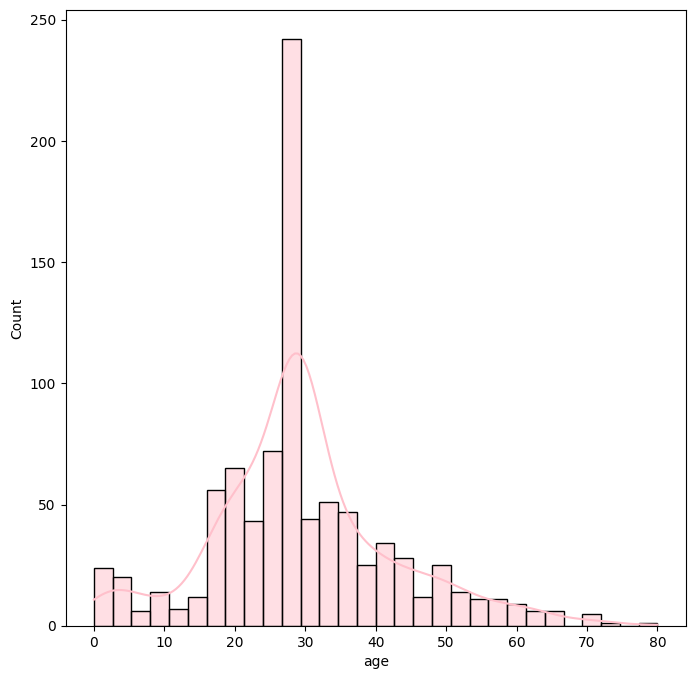

In [268]:
sns.histplot(data=training_data, x='age', kde=True, color='pink')
plt.show()

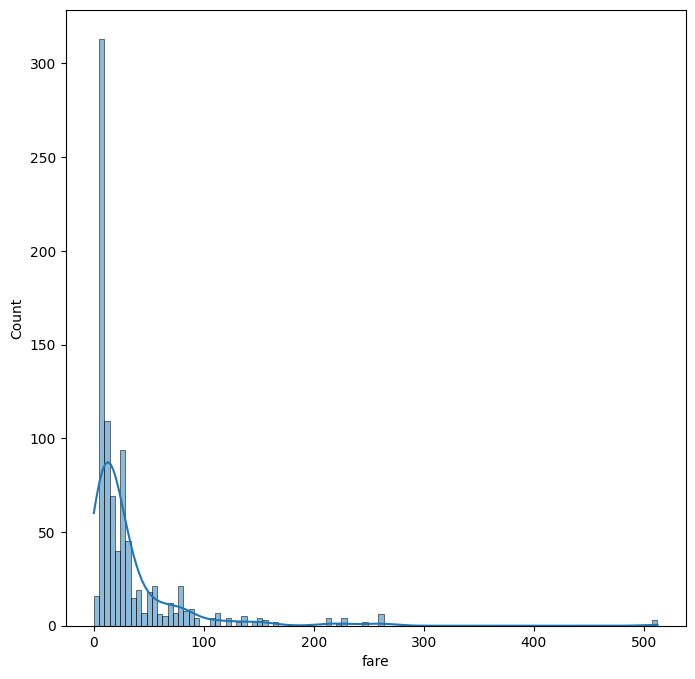

In [269]:
sns.histplot(data=training_data, x='fare',kde=True,)
plt.show()

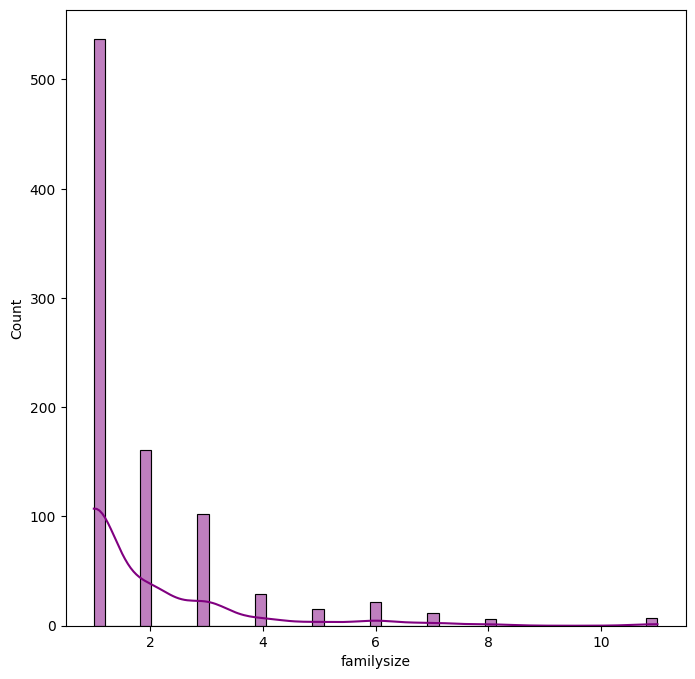

In [270]:
sns.histplot(data=training_data, x='familysize', kde=True, color='purple')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

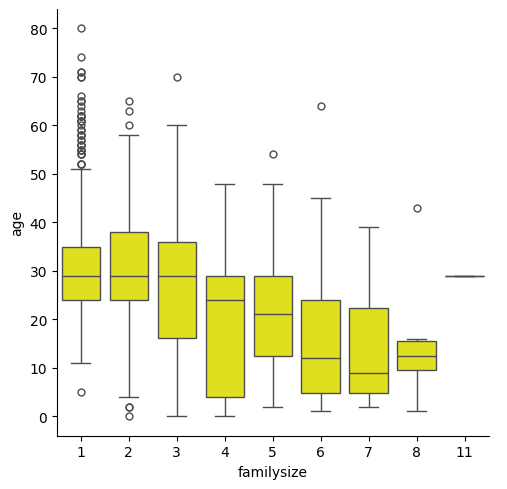

In [271]:
sns.catplot(data=training_data, x='familysize', y='age', kind= 'box', color='yellow')
plt.show

+ ##### **KDE Plot** 

+ A KDE plot uses a continuous curve, or kernel, to estimate the density of each data point along an axis. All of the kernels are then added together to create a single smooth density estimate. KDE plots are more flexible than histograms because they offer more options for kernels and bandwidth. KDE plots are often used to visualize probability density functions in statistical libraries like Seaborn and Matplotlib.

In [272]:
import matplotlib.pyplot as plt # type: ignore

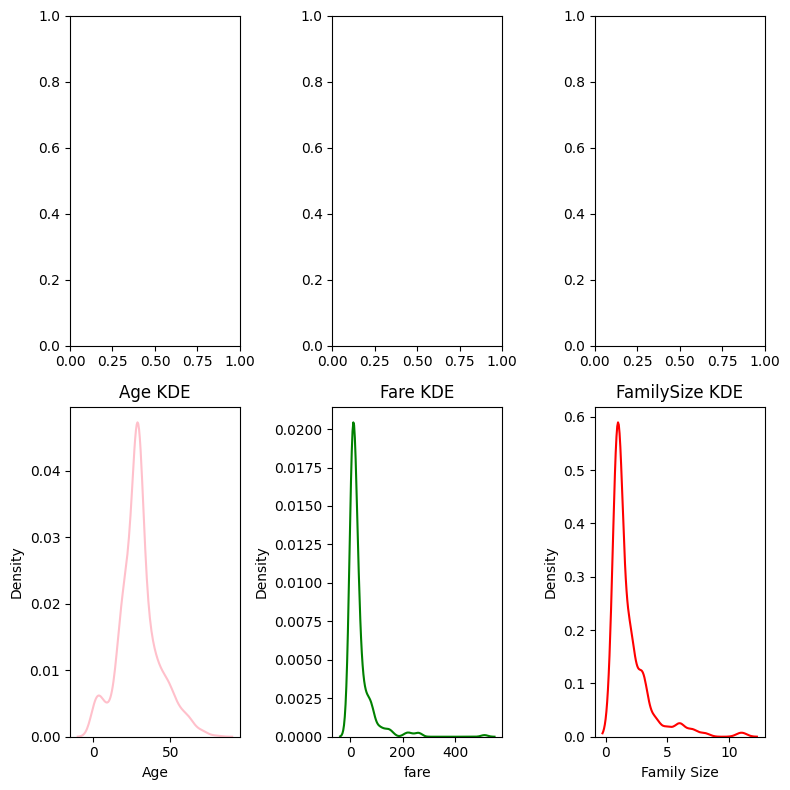

In [273]:
# Create the axes
fig, axes = plt.subplots(2, 3)

# Plot the KDE
sns.kdeplot(training_data['age'], ax=axes[1, 0], color='pink')
axes[1, 0].set_title('Age KDE')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Density')

sns.kdeplot(training_data['fare'], ax=axes[1, 1], color='green')
axes[1, 1].set_title('Fare KDE')
axes[1, 1].set_xlabel('fare')
axes[1, 1].set_ylabel('Density')

sns.kdeplot(training_data['familysize'], ax=axes[1, 2], color='red')
axes[1, 2].set_title('FamilySize KDE')
axes[1, 2].set_xlabel('Family Size')
axes[1, 2].set_ylabel('Density')

plt.tight_layout()
plt.show()

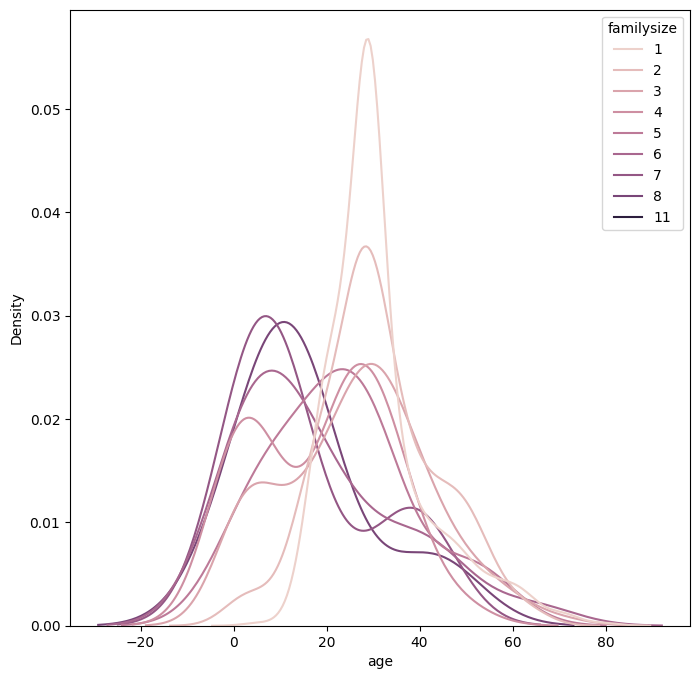

In [274]:
sns.kdeplot(data=training_data, x='age', hue='familysize', common_norm=False)
plt.show()

+ #### **Create box plots to visualize the distribution of 'Fare' and 'Age'**

+ The method to summarize a set of data that is measured using an interval scale is called a box and whisker plot. These are maximum used for data analysis.

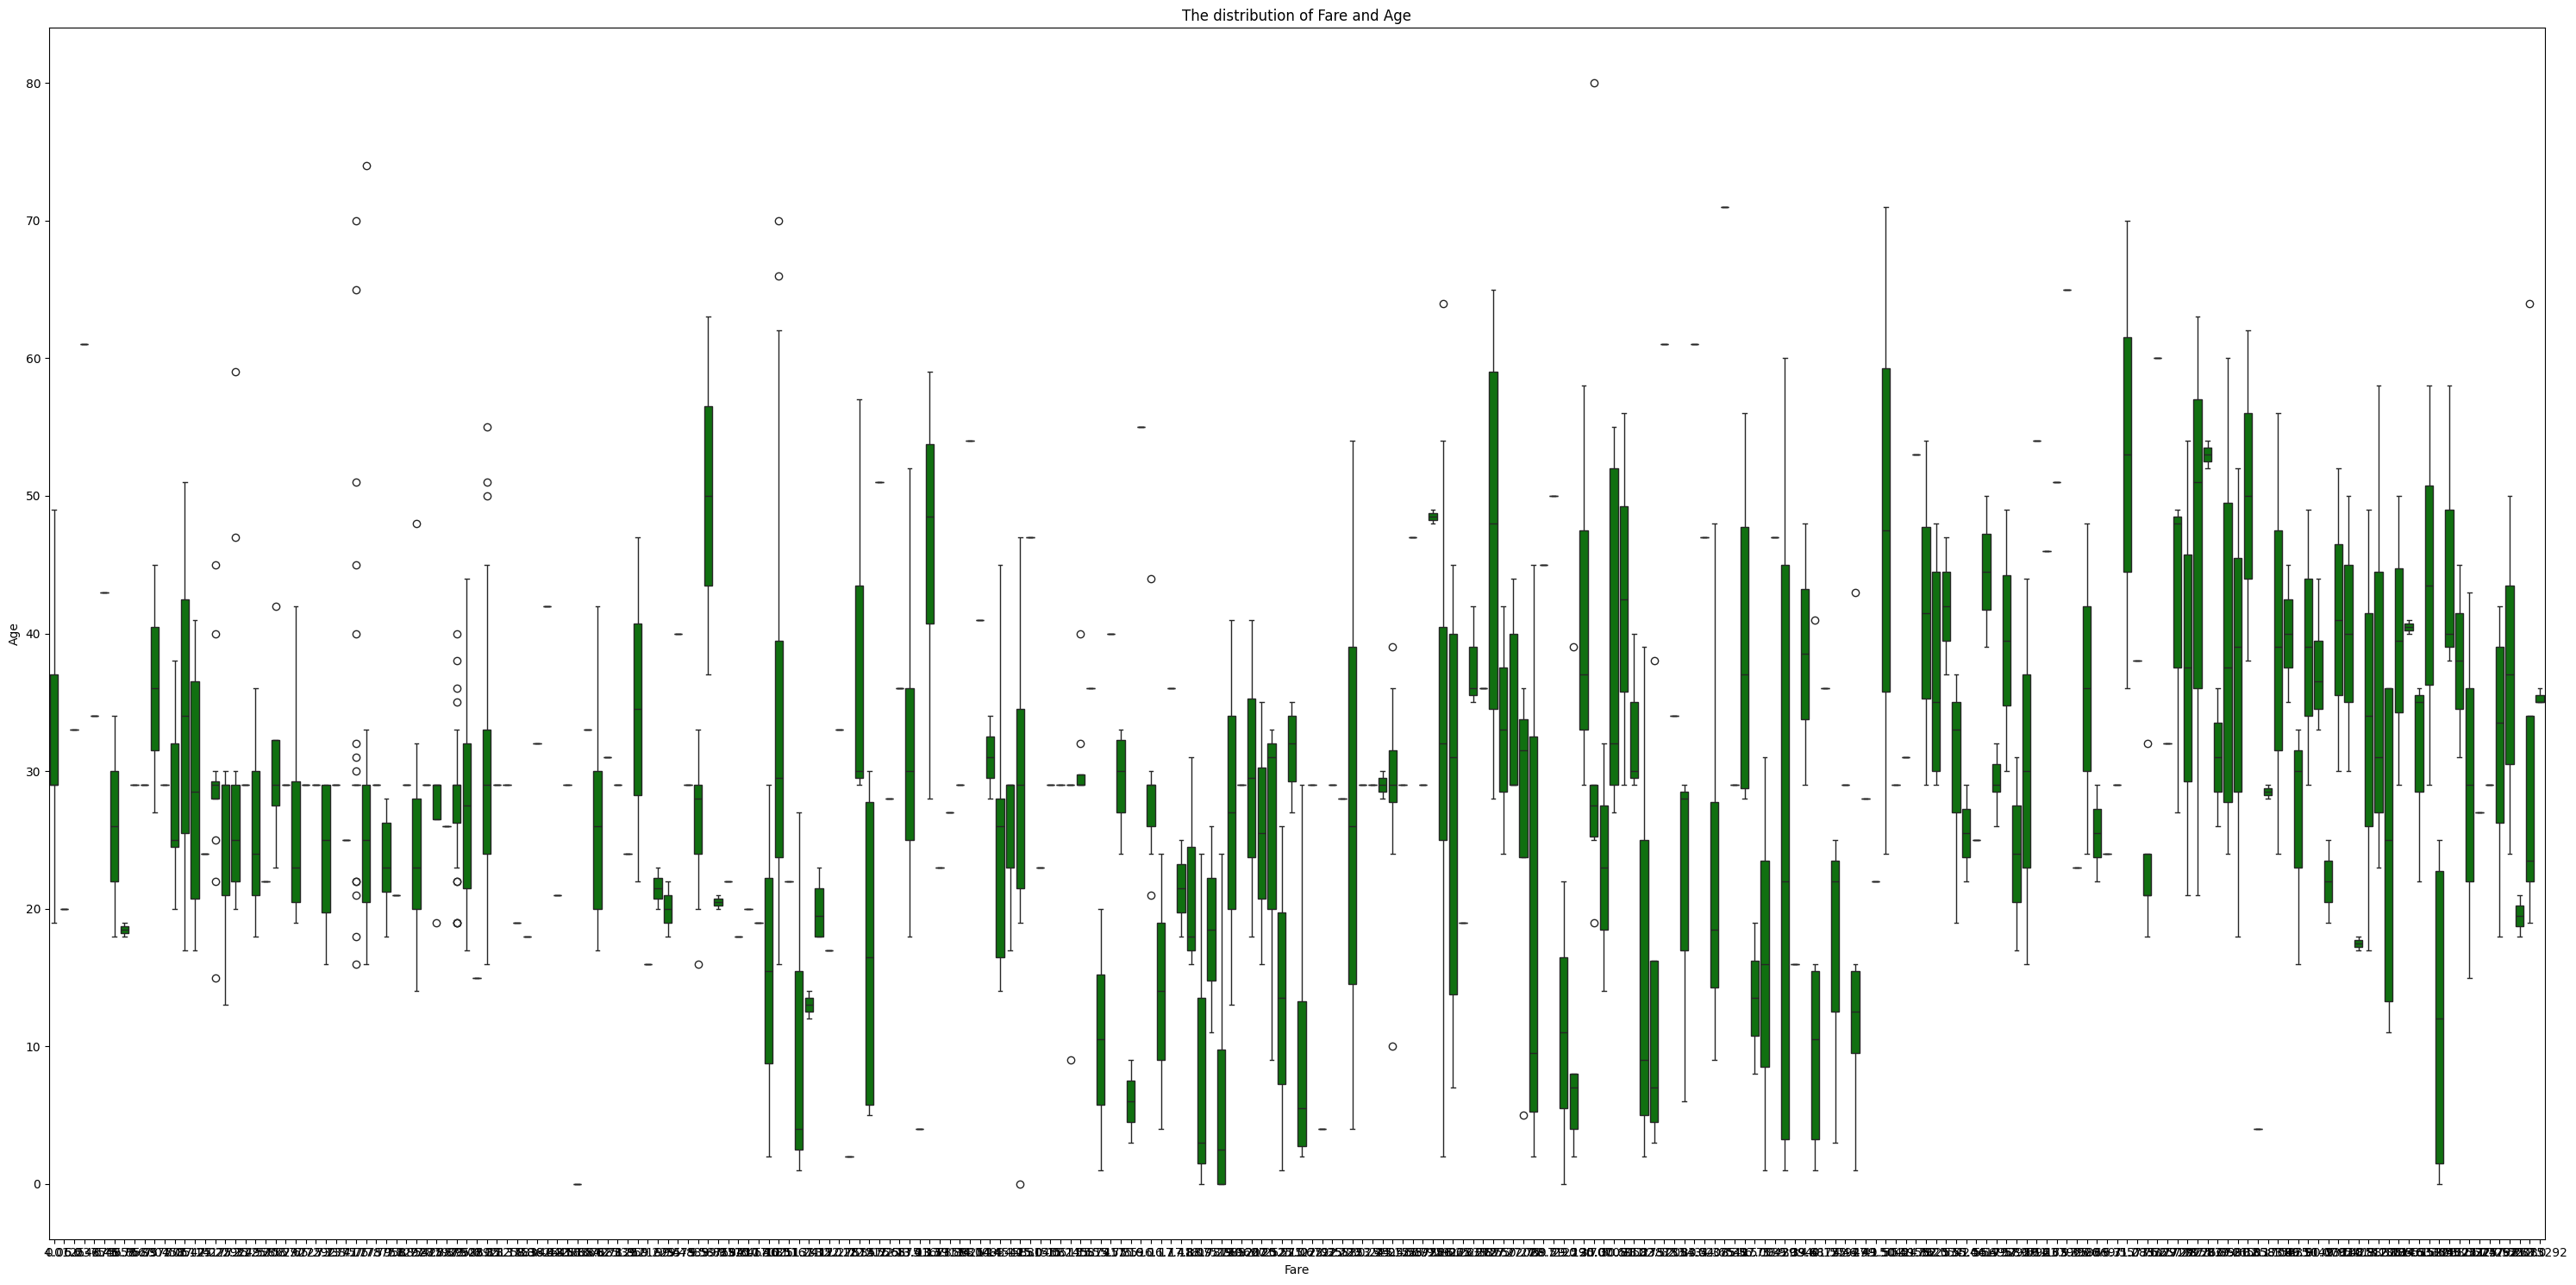

In [275]:
# Create a Boxplot
plt.figure(figsize=(30, 15))
sns.boxplot(data=training_data, x='fare', y='age', color='green')
plt.title("The distribution of Fare and Age")
plt.xlabel('Fare')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

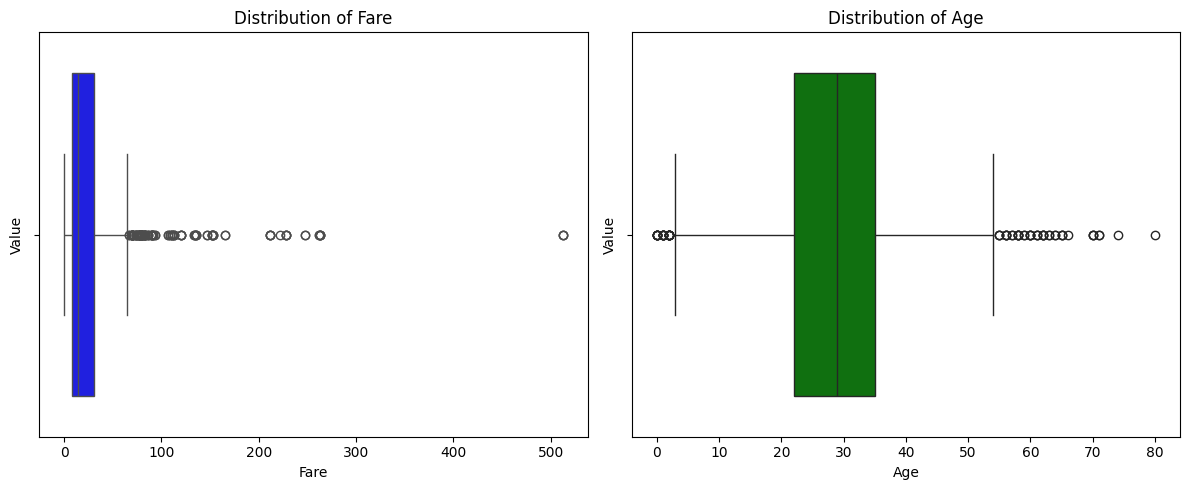

In [276]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Box plot for Fare
sns.boxplot(x='fare', data=training_data, ax=ax1, color='blue')
ax1.set_title('Distribution of Fare')
ax1.set_xlabel('Fare')
ax1.set_ylabel('Value')

# Box plot for Age
sns.boxplot(x='age', data=training_data, ax=ax2, color='green')
ax2.set_title('Distribution of Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Value')

plt.tight_layout()
plt.show()

#### **3. Feature Relationships:**

+ #### **Plot scatter plots to analyze the relationship between 'Fare' and 'Age'**

+ Scatter plots are the graphs that present the relationship between two variables in a data-set.It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. These plots are often called scatter graphs or scatter diagrams.

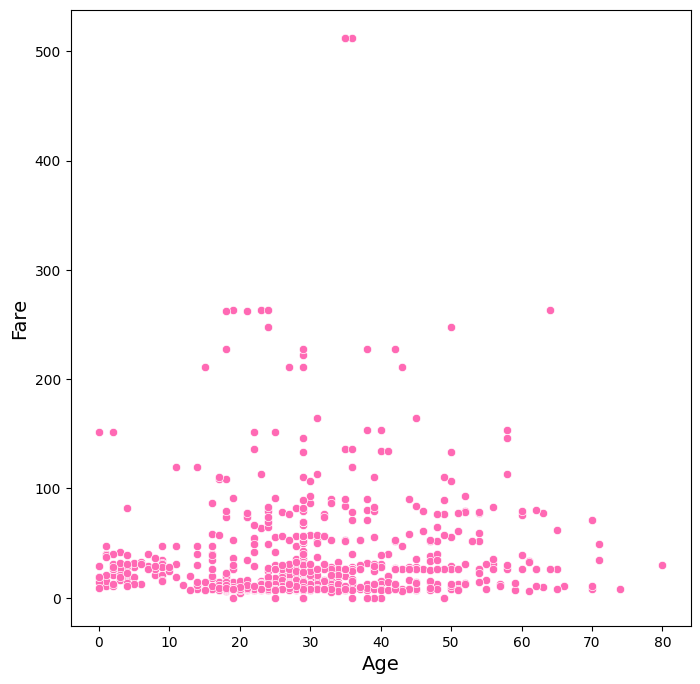

In [277]:
# set up the scatter plot
plt.rcParams['figure.figsize']= (8,8)
sns.scatterplot(x='age', y='fare', data=training_data, color=['hotpink'], vmin=0, vmax=100)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.show()

+ #### **Create a heatmap of the correlation matrix**

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [279]:
training_data.head(2)

passengerid  survived pclass     title  \
0            1         0      3   Braund,   
1            2         1      1  Cumings,   

                                         name  age  sibsp  parch     ticket  \
0                             Mr. Owen Harris   22      1      0  A/5 21171   
1  Mrs. John Bradley (Florence Briggs Thayer)   38      1      0   PC 17599   

      fare  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  \
0   7.2500       False      True       False       False        True   
1  71.2833        True     False        True       False       False   

   familysize  isalone  fare_log  
0           2        0  0.860338  
1           2        0  1.852988

In [280]:
training_data.columns

Index(['passengerid', 'survived', 'pclass', 'title', 'name', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'familysize', 'isalone', 'fare_log'],
      dtype='object')

In [281]:
training_data.head(2)

passengerid  survived pclass     title  \
0            1         0      3   Braund,   
1            2         1      1  Cumings,   

                                         name  age  sibsp  parch     ticket  \
0                             Mr. Owen Harris   22      1      0  A/5 21171   
1  Mrs. John Bradley (Florence Briggs Thayer)   38      1      0   PC 17599   

      fare  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  \
0   7.2500       False      True       False       False        True   
1  71.2833        True     False        True       False       False   

   familysize  isalone  fare_log  
0           2        0  0.860338  
1           2        0  1.852988

+ #### **Encoding the Training Data**

In [282]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [283]:
sex_female_en = LabelEncoder()
training_data['sex_female']= sex_female_en.fit_transform(training_data['sex_female'])

In [284]:
sex_male_en = LabelEncoder()
training_data['sex_male']= sex_male_en.fit_transform(training_data['sex_male'])

In [285]:
embarked_C_en = LabelEncoder()
training_data['embarked_C']= embarked_C_en.fit_transform(training_data['embarked_C'])

In [286]:
embarked_Q_en = LabelEncoder()
training_data['embarked_Q']= embarked_Q_en.fit_transform(training_data['embarked_Q'])

In [287]:
embarked_S_en = LabelEncoder()
training_data['embarked_S']= embarked_S_en.fit_transform(training_data['embarked_S'])

In [288]:
name_en = LabelEncoder()
training_data['name']= name_en.fit_transform(training_data['name'])

In [289]:
title_en = LabelEncoder()
training_data['title']= title_en.fit_transform(training_data['title'])

In [290]:
ticket_en = LabelEncoder()
training_data['ticket']= ticket_en.fit_transform(training_data['ticket'])

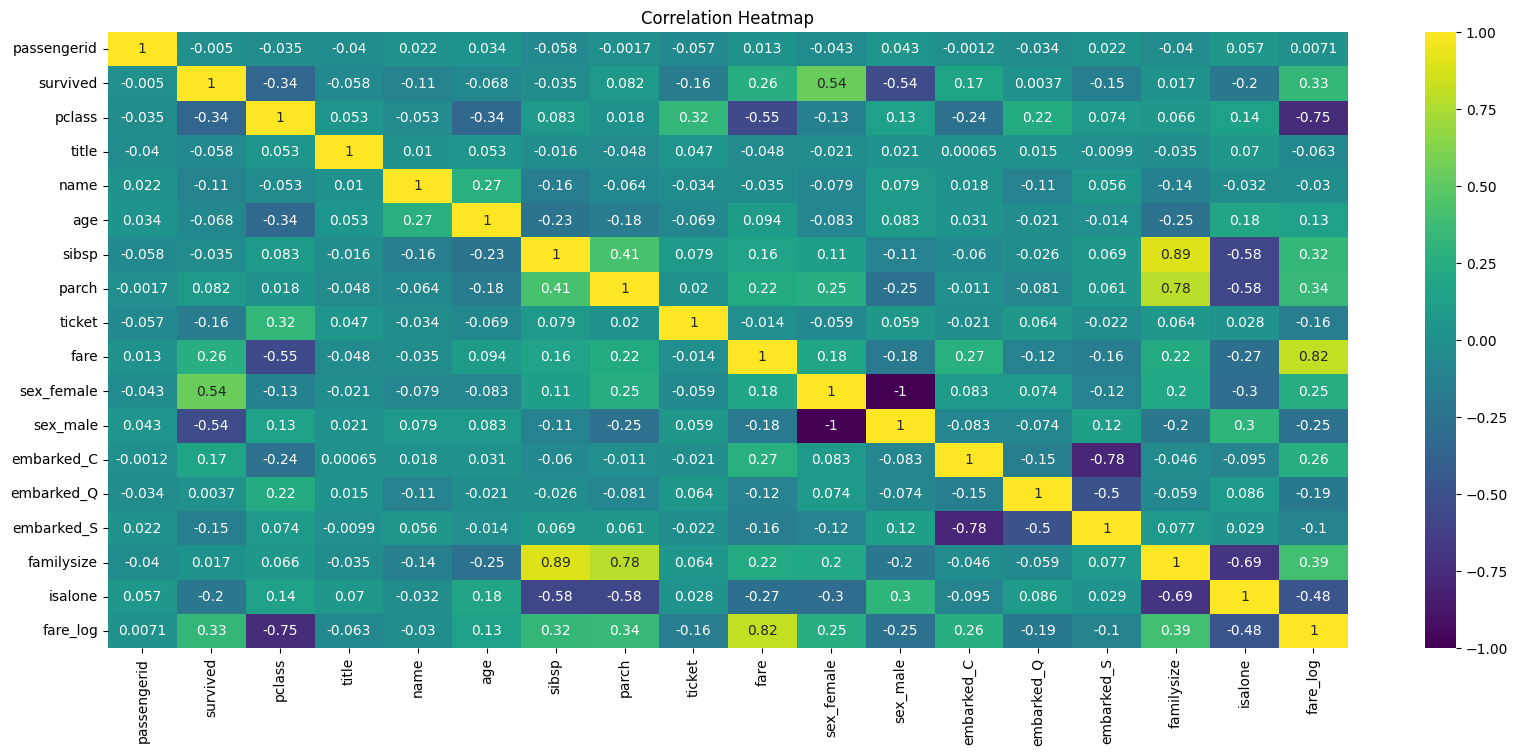

In [291]:
# Calculate correlation matrix
corr_matrix = training_data[['passengerid', 'survived', 'pclass', 'title', 'name', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'familysize', 'isalone', 'fare_log']].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

### **Task 2: Exploratory Data Analysis II**

#### **1. Categorical Variable Analysis:**

+ #### **Plot bar plots for 'Pclass', 'Sex', 'Embarked', and 'Title'**

In [292]:
print(training_data.columns)

Index(['passengerid', 'survived', 'pclass', 'title', 'name', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'familysize', 'isalone', 'fare_log'],
      dtype='object')


In [293]:
import matplotlib.pyplot as plt

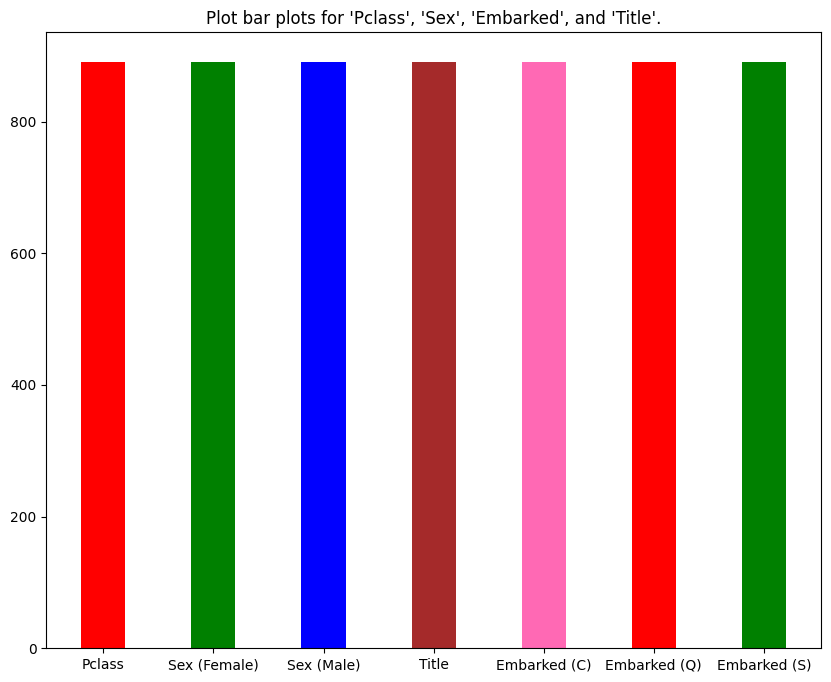

In [294]:
x= [training_data['pclass'], training_data['title'], training_data['sex_female'], training_data['sex_male'], training_data['embarked_C'], training_data['embarked_Q'],
    training_data['embarked_S']]
plt.figure(figsize=(10,8))
plt.bar(range(len(x)), height=[len(arr) for arr in x], width=0.4, color=['r', 'g', 'b', 'brown', 'hotpink'])
plt.xticks(range(len(x)), ['Pclass', 'Sex (Female)', 'Sex (Male)', 'Title', 'Embarked (C)', 'Embarked (Q)', 'Embarked (S)'])
plt.title("Plot bar plots for 'Pclass', 'Sex', 'Embarked', and 'Title'.")
plt.show()

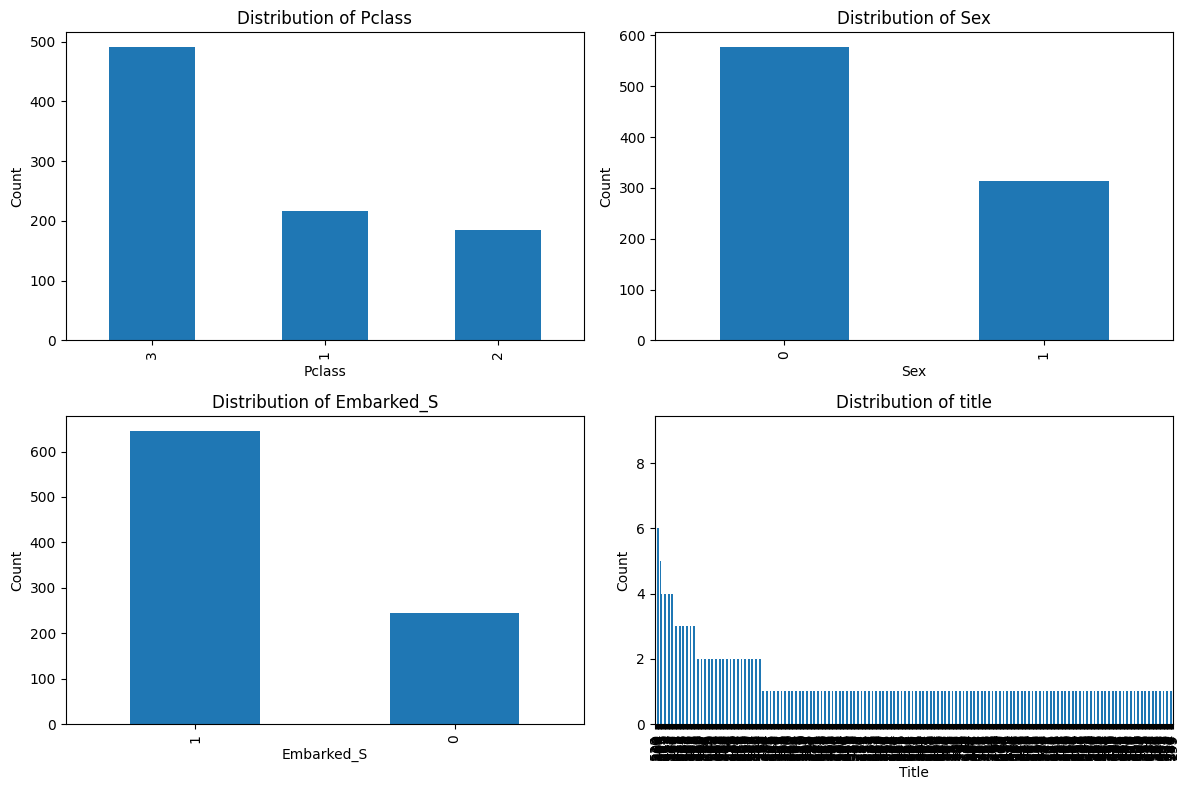

In [295]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Bar plot for Pclass
training_data['pclass'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Distribution of Pclass')
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count')

# Bar plot for Sex
training_data['sex_female'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('Distribution of Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')

# Bar plot for Embarked
training_data['embarked_S'].value_counts().plot(kind='bar', ax=ax3)
ax3.set_title('Distribution of Embarked_S')
ax3.set_xlabel('Embarked_S')
ax3.set_ylabel('Count')

# Bar plot for Title
training_data['title'].value_counts().plot(kind='bar', ax=ax4)
ax4.set_title('Distribution of title')
ax4.set_xlabel('Title')
ax4.set_ylabel('Count')

plt.tight_layout()
plt.show()

#### **2. Interaction Analysis:**

+ #### **Create violin plots to visualize the interaction between 'Pclass' and 'Fare'**

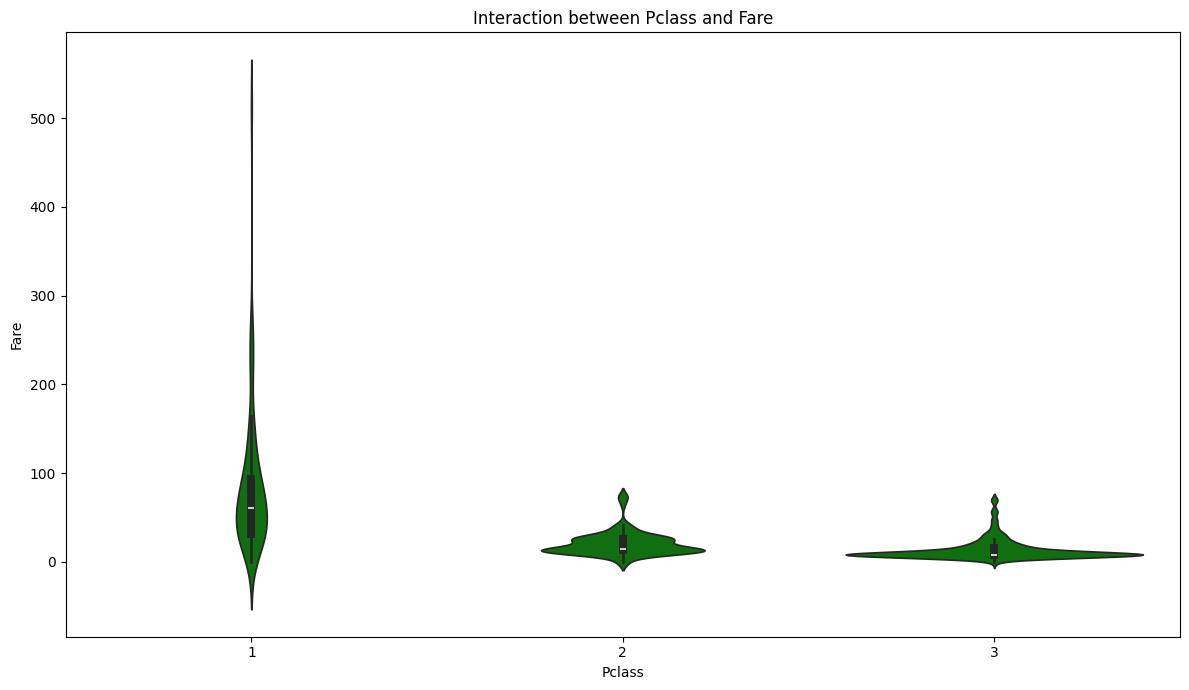

In [296]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.violinplot(x='pclass', y='fare', data=training_data, ax=ax, color='green')

ax.set_title('Interaction between Pclass and Fare')
ax.set_xlabel('Pclass')
ax.set_ylabel('Fare')
plt.tight_layout()
plt.show()

+ #### **Plot swarm plots for 'Survived' vs 'Age' and 'Survived' vs 'Fare'**

In [297]:
training_data.columns

Index(['passengerid', 'survived', 'pclass', 'title', 'name', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'familysize', 'isalone', 'fare_log'],
      dtype='object')

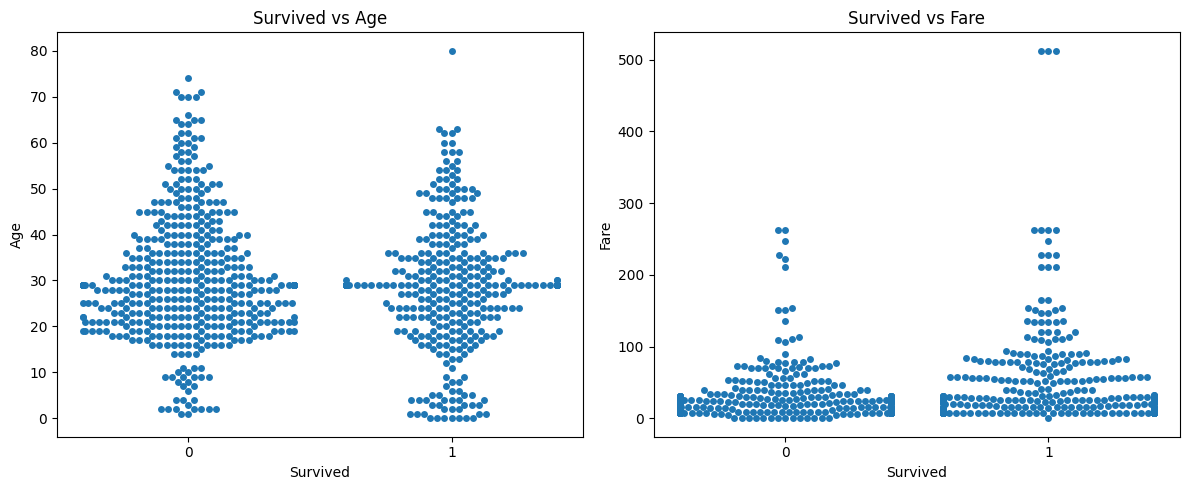

In [298]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Swarm plot for 'Survived' vs 'Age'
sns.swarmplot(x='survived', y='age', data=training_data, ax=ax1)
ax1.set_title('Survived vs Age')
ax1.set_xlabel('Survived')
ax1.set_ylabel('Age')

# Swarm plot for 'Survived' vs 'Fare'
sns.swarmplot(x='survived', y='fare', data=training_data, ax=ax2)
ax2.set_title('Survived vs Fare')
ax2.set_xlabel('Survived')
ax2.set_ylabel('Fare')
plt.tight_layout()
plt.show()

#### **3. Feature Interactions:**

+ #### **Identify and visualize potential feature interactions or collinearity using pair plots**

<Figure size 300000x150000 with 0 Axes>

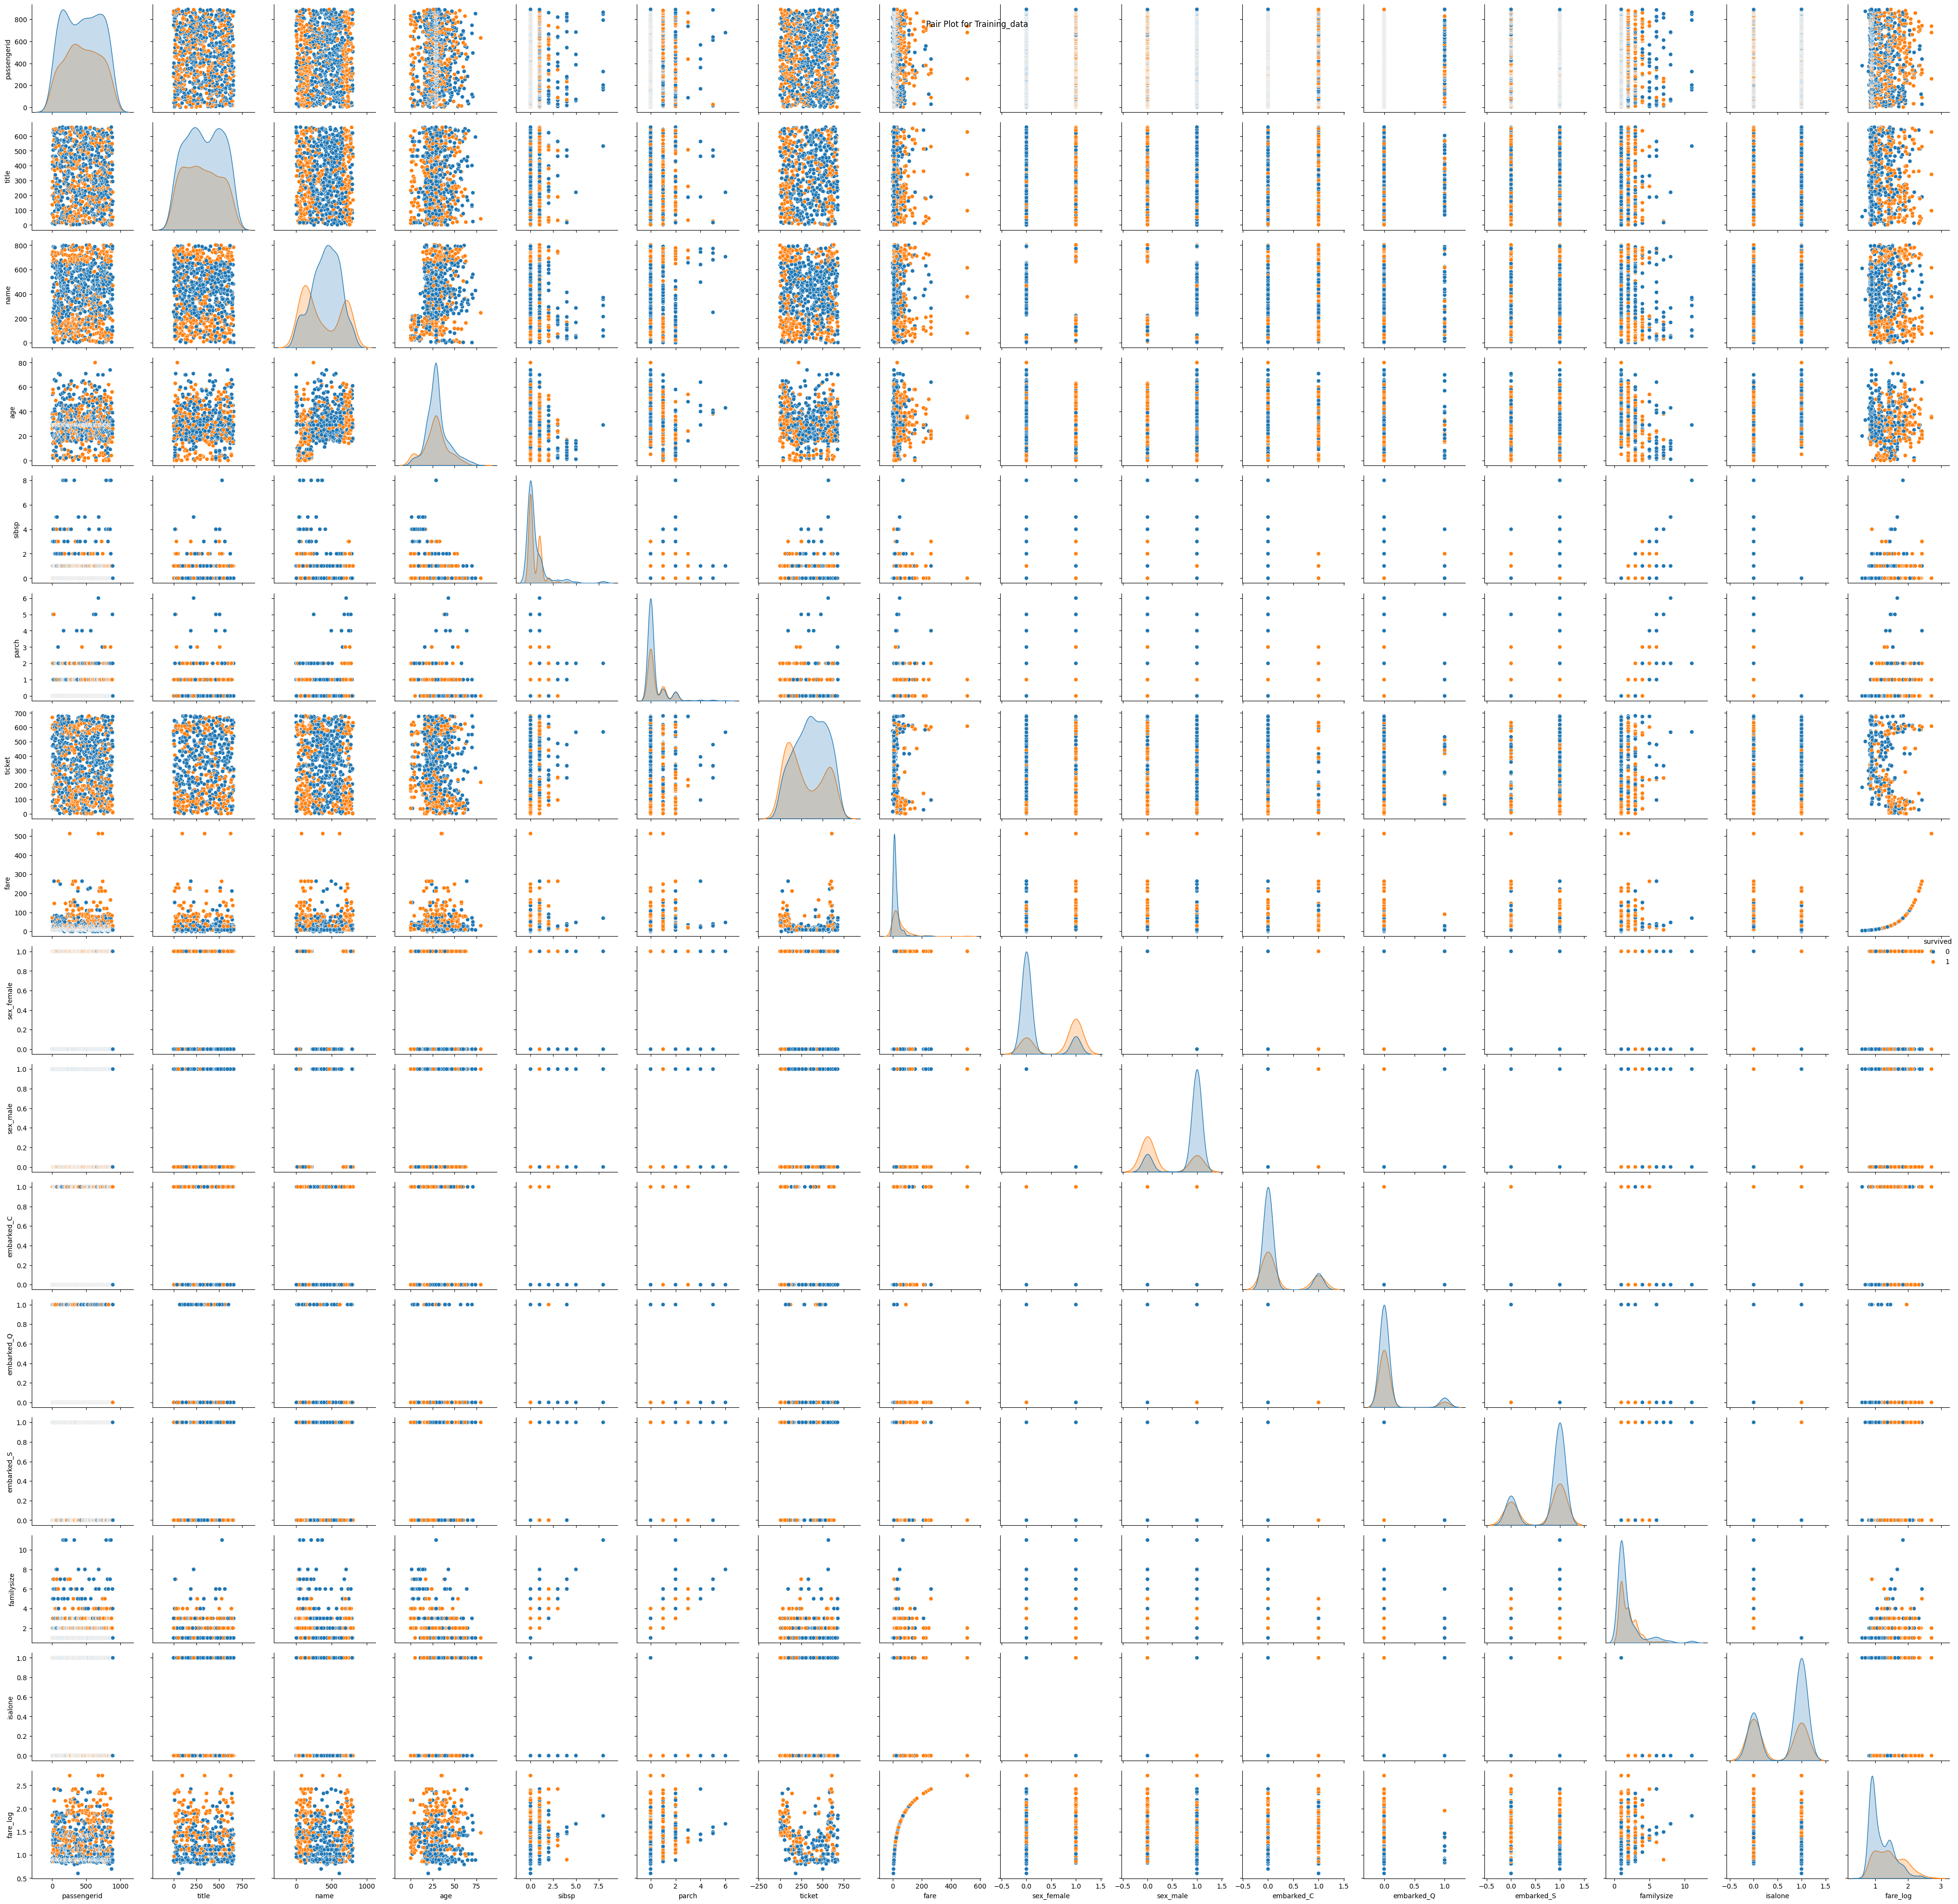

In [299]:
plt.figure(figsize=(3000,1500))
sns.pairplot(training_data, hue='survived')
plt.suptitle('Pair Plot for Training_data')
plt.tight_layout()
plt.show()